This notebook lives at: [https://github.com/petermchale/QQ-plots](https://github.com/petermchale/QQ-plots)

Consider this histogram of a data sample (the volumes in microns cubed of nevi, also called moles, on the back of 50-day old mice):

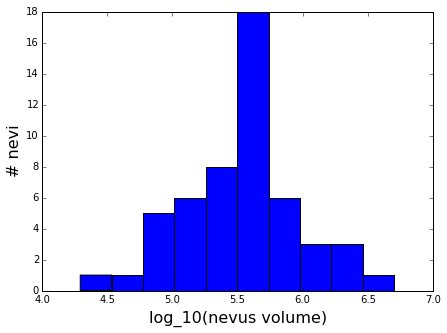

In [1]:
import numpy as np 
nevus_size_sample = np.loadtxt('lesion_volume_derm_wt_1e3.dat')*1e3
log_nevus_size_sample = np.log10(nevus_size_sample)

from matplotlib import pyplot as plt
%matplotlib inline

fontsize = 16
datapoint_size = 30 
figure_size = (7,5)
figure_facecolor = 'w'

fig = plt.figure(figsize=figure_size, facecolor=figure_facecolor)
ax = fig.add_subplot(111)
ax.hist(log_nevus_size_sample)
ax.set_xlabel('log_10(nevus volume)', fontsize=fontsize)
ax.set_ylabel('# nevi', fontsize=fontsize)

The distribution shown above appears to be normal (when nevus volume is put on a log scale). And there are theoretical reasons (having to do with branching-process theory) to expect the log of nevus volume to be drawn from a normal distribution. 

But how can we tell whether a normal distribution is a good model for the dataset? We could apply the [Kolmogorov-Smirnov test](https://en.wikipedia.org/wiki/Kolmogorov%E2%80%93Smirnov_test), or its variants, the [Anderson-Darling test](https://en.wikipedia.org/wiki/Anderson%E2%80%93Darling_test) or the [Kuiper test](https://en.wikipedia.org/wiki/Kuiper%27s_test). But there are a number of reasons why this approach is not that informative, [as described quite nicely here](http://allendowney.blogspot.com/2013/08/are-my-data-normal.html). More informative is the following graphical approach, which is a variant of the well-known Q-Q plot. 

First, we need to establish two basic concepts. The [order statistics](https://en.wikipedia.org/wiki/Order_statistic) of a sample of data are simply the data points ordered by value. The corresponding [rankits](https://en.wikipedia.org/wiki/Rankit) are the expected values of the order statistics of an equal-sized sample taken from a standard normal distribution. 

Let's obtain the order statistics of the nevus data:

In [2]:
log_nevus_size_sample_sorted = np.sort(log_nevus_size_sample)

Now, let's generate a set of rankits:

In [3]:
def generate_rankits(number_of_data_per_sample, number_of_samples=1000): 
    normal_samples = np.random.normal(size=(number_of_samples, number_of_data_per_sample))
    normal_samples_sorted = np.sort(normal_samples, axis=1)
    return np.mean(normal_samples_sorted, axis=0)

Here is a plot of the order statistics of the nevus sample against the corresponding rankits:

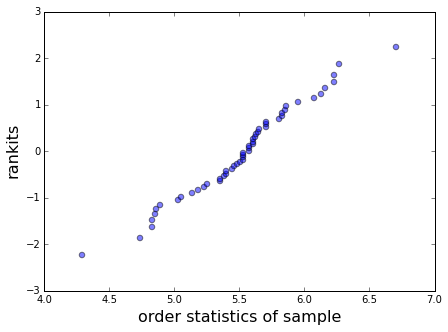

In [4]:
def plot_scatter(order_statistics):

    rankits = generate_rankits(len(order_statistics))

    fig = plt.figure(figsize=figure_size, facecolor=figure_facecolor)
    ax = fig.add_subplot(111)
    ax.scatter(order_statistics, rankits, s=datapoint_size, alpha=0.5)
    ax.set_xlabel('order statistics of sample', fontsize=fontsize)
    ax.set_ylabel('rankits', fontsize=fontsize)

plot_scatter(log_nevus_size_sample_sorted)

Is this what we should expect under the assumption of normality? Let's repeat the analysis, this time replacing the nevus sample with a synthetic data set of the same size but sampled from a normal distribution. 

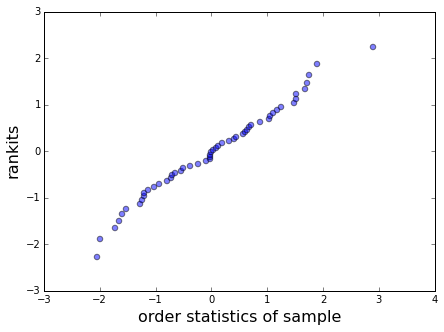

In [5]:
def normal_order_statistics(number_of_data_per_sample): 
    return np.sort(np.random.normal(size=number_of_data_per_sample))

plot_scatter(normal_order_statistics(len(log_nevus_size_sample_sorted)))

Given the similarity of the graphs (they are both close to straight lines), it seems like the nevus data could well have come from a normal distribution. But there is a lot of noise that prevents us from being confident in this conclusion. 

The only way to increase confidence is to measure yet more nevi (larger sample size). The reason has to do with a remarkable property of order statistics: The ith order statistic approaches its expected value as the size of the sample increases! To demonstrate this, let's generate synthetic data sets of ever larger sizes and plot against the corresponding rankits in each case: 

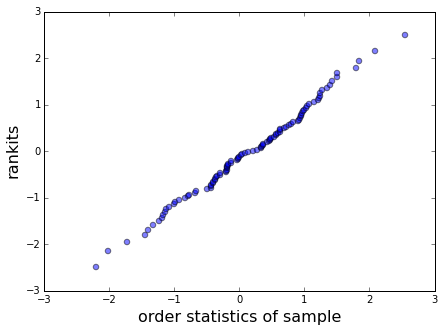

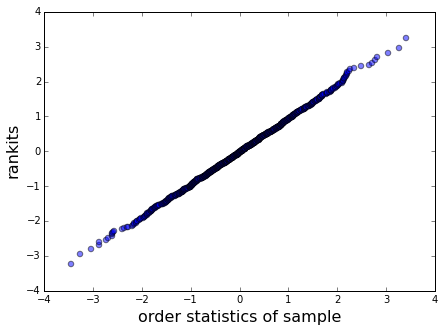

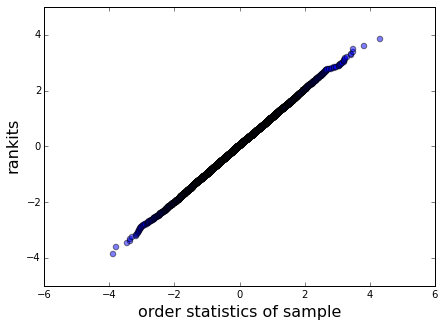

In [6]:
plot_scatter(normal_order_statistics(100))
plot_scatter(normal_order_statistics(1000))
plot_scatter(normal_order_statistics(10000))

This nicely illustrates that under the hypothesis that our nevus sample was drawn from a normal distribution, a plot of rankits against order statistics of the sample should be a straight line, given enough data. 

It also explains why we don't need to estimate parameters of the normal distribution in order to apply the QQ-plot 'test'. Estimating parameters amounts to scaling and shifting the normal distribution in order to match the nevus histogram. But scaling and shifting are linear operations that map the line shown above into a new line, as opposed to a nonlinear curve. 

The conclusion: a normal distribution is a decent model for the nevus data given how little of them we have. 

But could we say the same of other distributions? For example, do the order statistics of a superficially similar distribution, the [Cauchy distribution](https://en.wikipedia.org/wiki/Cauchy_distribution), also produce a straight line when plotted against rankits? They don't: 

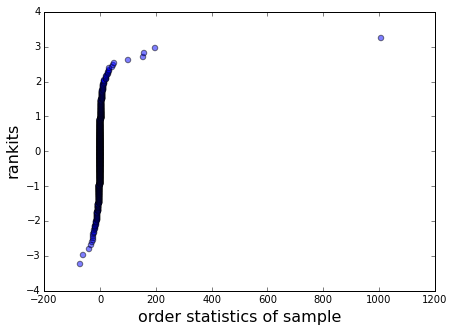

In [7]:
def cauchy_order_statistics(number_of_data_per_sample): 
    return np.sort(np.random.standard_cauchy(size=number_of_data_per_sample))

plot_scatter(cauchy_order_statistics(1000))

... not even for sample sizes comparable to those of our nevus data set:

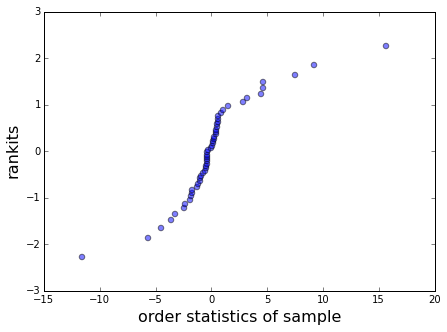

In [8]:
plot_scatter(cauchy_order_statistics(len(log_nevus_size_sample_sorted)))

In both cases, the plot is sigmoidal (not linear), reflecting the fact that the Cauchy distribution has longer tails than the normal distribution.

This 'negative control experiment' highlights the real power of the QQ-analysis: it points to the most informative statistical tests to do next. In this case, I would be inclined to apply the Anderson-Darling test, which examines the tails of distributions, with the expectation that it would reject the Cauchy model in favor of the Normal model. 